# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    
    return ((x**2)*numpy.sin(x))
    
    
#print (f(1.5))
   
    

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return(2*x*numpy.sin(x)-(x**2)*numpy.cos(x)+2*numpy.cos(x)-2)
#print(g(1.5))

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    
    return(g(xmax)-g(xmin))
  
#print(integrate_analytic(7, 0))

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    S=0
    dx = (xmax-xmin)/N
    #x = int((N/2) + 1)
    
    for i in range(1,(N+1)):
         
        S = S + f(xmin) + 4*f(xmin+(dx/2)) + f(xmin + (dx))
        xmin = xmin + dx
 
    X = (dx/6)*S
    
    return(X)

#print (integrate_numeric(xmin=0, xmax=4, N=50))



Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


<function matplotlib.pyplot.show>

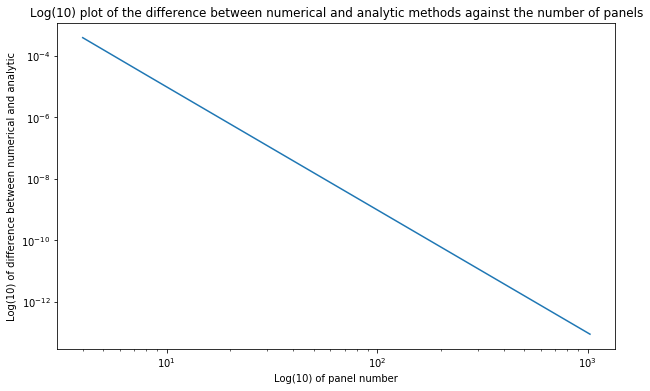

In [13]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
y=[]
for i in panel_counts:
    y.append(result_analytic-integrate_numeric(x0,x1,i))
plt.figure(figsize=(10,6))
plt.plot(panel_counts,y)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Log(10) of panel number")
plt.ylabel("Log(10) of difference between numerical and analytic")
plt.title("Log(10) plot of the difference between numerical and analytic methods against the number of panels")
plt.show


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels does infact increases the accuracy of the numerical method. This is well illustrated on the graph above. As the number of panels becomes larger and larger python can run into two problems. The first is that the increasinglyu small numbers that the function calculates take more and more space in memory. Eventually python starts to round numbers to reduce space and this will introduce a massive error in the results. The second is that the function itself will take longer and longer to run as more and more loops have to be run. This also takes its toll on the memory which can introduce more potential rounding errors and worst case the code simply wont run. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Like Simpsons rule, the trapezium rule will also increase in accuracy as the number of panels increase. This will be at a slower rate however due to the simplisity of the method. This could easily be illustrated by plotting the two methods on a log graph like shown above. The trapezium rule would have a larger gradient than the one above. 
